In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

In [4]:
# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [5]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1    # vertical line
filters[3, :, :, 1] = 1    # horizontal line

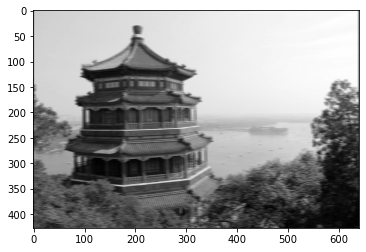

In [6]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

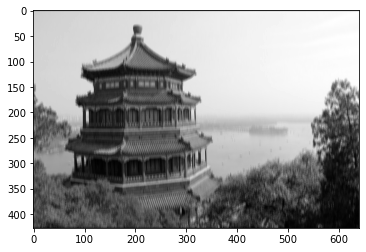

In [7]:
plt.imshow(outputs[0, :, :, 0], cmap="gray") # plot 1st image's 1st feature map
plt.show()

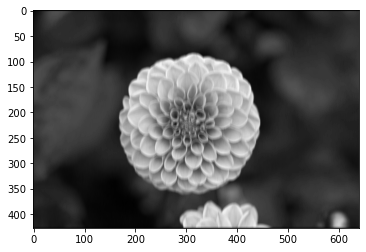

In [12]:
plt.imshow(outputs[1, :, :, 0], cmap="gray") # plot 2nd image's 1st feature map
plt.show()

Pre-trained models

In [2]:
model = keras.applications.resnet.ResNet50(weights="imagenet")

2022-12-31 16:09:54.929786: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-31 16:09:54.930042: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-31 16:09:54.931961: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


102973440/102967424 [==============================] - 13s 0us/step


In [3]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [9]:
images_resized = tf.image.resize(images, [224, 224])
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

In [13]:
Y_proba = model.predict(inputs)

In [14]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

Image #0
  n02825657 - bell_cote    82.35%
  n03877845 - palace       6.75%
  n03781244 - monastery    4.19%

Image #1
  n03530642 - honeycomb    49.83%
  n13040303 - stinkhorn    33.95%
  n02206856 - bee          4.35%



Transfer Learning

In [6]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples # 3670
class_names = info.features["label"].names # ["dandelion", "daisy", ...]
n_classes = info.features["label"].num_classes # 5
info.supervised_keys

('image', 'label')

In [5]:
for item in dataset["train"]:
    print(item)

2023-01-02 17:07:26.239109: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-01-02 17:07:26.258473: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2099940000 Hz


(<tf.Tensor: shape=(254, 320, 3), dtype=uint8, numpy=
array([[[128,  92,   6],
        [128,  92,   6],
        [128,  92,   6],
        ...,
        [149, 111,   4],
        [150, 112,   5],
        [150, 112,   5]],

       [[128,  92,   6],
        [128,  92,   6],
        [128,  92,   6],
        ...,
        [150, 112,   5],
        [151, 113,   6],
        [151, 113,   6]],

       [[129,  93,   7],
        [129,  93,   7],
        [129,  93,   7],
        ...,
        [151, 113,   6],
        [152, 114,   7],
        [153, 115,   8]],

       ...,

       [[194, 157,   4],
        [196, 156,   7],
        [196, 156,   9],
        ...,
        [218, 179,   0],
        [219, 180,   1],
        [219, 180,   0]],

       [[196, 159,   9],
        [198, 157,  13],
        [197, 156,  16],
        ...,
        [217, 178,   0],
        [218, 179,   0],
        [218, 179,   0]],

       [[196, 158,  13],
        [199, 158,  18],
        [198, 156,  18],
        ...,
        [216, 177,  